In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import os
os.chdir('/home/dongdong/SCR/pdz.run02')
chain=['A','B']
t_ref=mda.Universe('begin.pdb',top='begin.pdb')
group1=t_ref.select_atoms('segid A and (name C* or name N* or name O* or name S*)')
num_walkers=16
for en in range(num_walkers):
    for it in range(81,85):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.system('cp begin.pdb md-nosol.tpr trj.sh index_p.ndx %s' %dirname)
        os.chdir(dirname)
        os.system('sh trj.sh')
        trjname='md_done.xtc'
        u=mda.Universe("begin.pdb",trjname)
        filename='Q_heavyatoms.cs'
        wf=open(filename,'w')
        sel2='segid B and (name C* or name N* or name O* or name S*)'
        group2=t_ref.select_atoms(sel2)
        nc=contacts.Contacts(u,selection=("segid A and (name C* or name N* or name O* or name S*)",sel2),refgroup=(group1,group2),method='soft_cut')
        nc.run()
        bound=nc.timeseries[:,1]
        for b in bound:
            wf.write(str(b)+'\n')
        wf.close()
        os.chdir('/home/dongdong/SCR/pdz.run02')
        


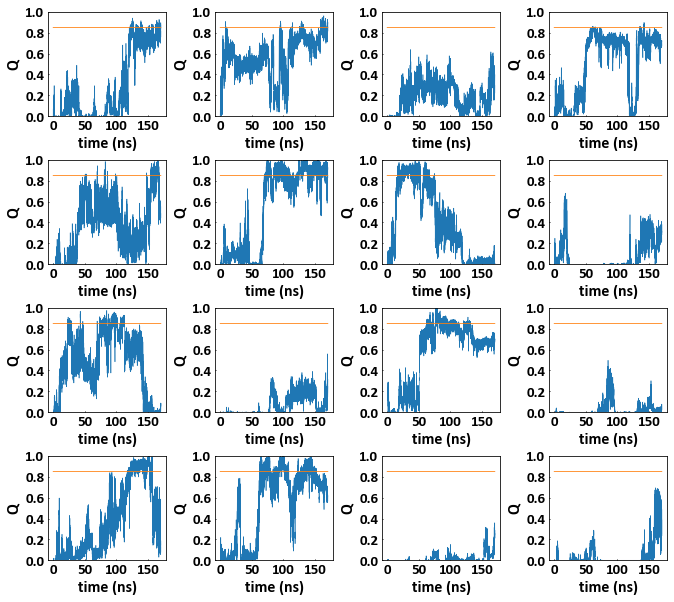

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=16)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,9))
num_walkers=16
os.chdir('/home/dongdong/SCR/pdz.run02')
for en in range(num_walkers):
    allQ=[]
    for it in range(85):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='Q_heavyatoms.cs'
        Q=np.loadtxt(filename)
        os.chdir('/home/dongdong/SCR/pdz.run02')
        allQ.extend(list(Q))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,allQ,lw=0.6)
    sub.set_ylabel(r'Q',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.,1.)
    #plt.xlim(25,55)
    sub.set_xticks(np.linspace(0,150,4))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(15)

plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
plt.savefig('/home/dongdong/SCR/pdz.run02/Q.png',dpi=600,bbox_inches='tight')
plt.show()

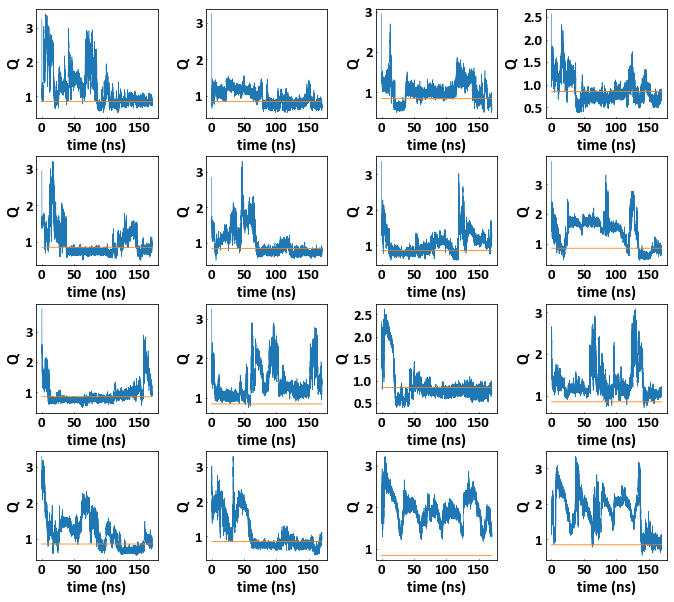

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=16)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,9))
num_walkers=16
os.chdir('/home/dongdong/SCR/pdz.run02')
for en in range(num_walkers):
    allQ=[]
    for it in range(85):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='plm.out'
        Q=np.loadtxt(filename)[:,-2]
        os.chdir('/home/dongdong/SCR/pdz.run02')
        allQ.extend(list(Q))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,allQ,lw=0.6)
    sub.set_ylabel(r'Q',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
    sub.tick_params(direction="in", length=1)
    #plt.ylim(0.,1.)
    #plt.xlim(25,55)
    sub.set_xticks(np.linspace(0,150,4))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(15)

plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
#plt.savefig('/home/dongdong/SCR/pdz.run02/Q.png',dpi=600,bbox_inches='tight')
plt.show()

<Figure size 720x648 with 0 Axes>

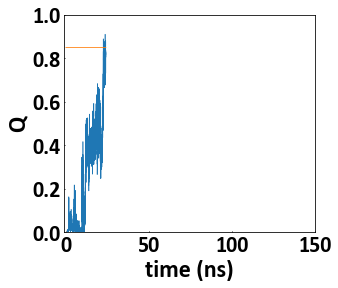

In [9]:
fig = plt.figure(figsize=(10,9))
num_walkers=16
os.chdir('/home/dongdong/SCR/pdz.run02')
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(4.5,4))
for en in range(8,9):
    allQ=[]
    for it in range(12):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='Q_heavyatoms.cs'
        Q=np.loadtxt(filename)
        os.chdir('/home/dongdong/SCR/pdz.run02')
        allQ.extend(list(Q))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(1,1,1)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,allQ,lw=0.6)
    sub.set_ylabel(r'Q',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.,1.)
    #plt.xlim(25,55)
    sub.set_xticks(np.linspace(0,150,4))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(22)
#plt.savefig('/home/dongdong/SCR/pdz.run02/Q8.png',dpi=600,bbox_inches='tight')
plt.show()

154


<Figure size 720x648 with 0 Axes>

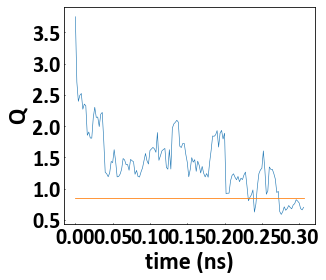

In [95]:
np.savetxt('sel.out',np.arange(300),fmt='%d')

In [17]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import os
os.chdir('/home/dongdong/SCR/pdz.run03')
chain=['A','B']
t_ref=mda.Universe('begin.pdb',top='begin.pdb')
group1=t_ref.select_atoms('segid A and (name C* or name N* or name O* or name S*)')
num_walkers=16
for en in range(num_walkers):
    for it in range(26,27):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.system('cp begin.pdb md-nosol.tpr trj.sh index_p.ndx %s' %dirname)
        os.chdir(dirname)
        os.system('sh trj.sh')
        trjname='md_done.xtc'
        u=mda.Universe("begin.pdb",trjname)
        filename='Q_heavyatoms.cs'
        wf=open(filename,'w')
        sel2='segid B and (name C* or name N* or name O* or name S*)'
        group2=t_ref.select_atoms(sel2)
        nc=contacts.Contacts(u,selection=("segid A and (name C* or name N* or name O* or name S*)",sel2),refgroup=(group1,group2),method='soft_cut')
        nc.run()
        bound=nc.timeseries[:,1]
        for b in bound:
            wf.write(str(b)+'\n')
        wf.close()
        os.chdir('/home/dongdong/SCR/pdz.run03')

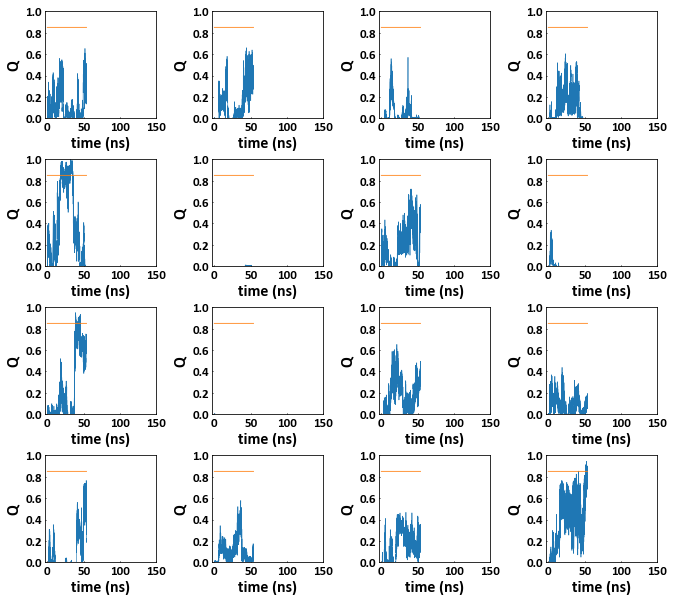

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=16)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,9))
num_walkers=16
os.chdir('/home/dongdong/SCR/pdz.run03')
for en in range(num_walkers):
    allQ=[]
    for it in range(27):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='Q_heavyatoms.cs'
        Q=np.loadtxt(filename)
        os.chdir('/home/dongdong/SCR/pdz.run03')
        allQ.extend(list(Q))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,allQ,lw=0.6)
    sub.set_ylabel(r'Q',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
    sub.tick_params(direction="in", length=1)
    plt.ylim(0.,1.)
    #plt.xlim(25,55)
    sub.set_xticks(np.linspace(0,150,4))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(13)
#plt.savefig('/home/dongdong/SCR/pdz.run02/Q.png',dpi=600,bbox_inches='tight')
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
plt.show()

In [5]:
d2=np.array([-1.066437, 2.495781, -2.045508, 2.101148, -1.930552, 2.181034, -1.530013, 2.472703, -2.335553])

In [48]:
ref

array([-1.0471828 ,  2.59215426, -2.4347167 ,  2.26425838, -2.25376797,
        2.36080599, -1.56287026,  2.31699634, -2.24224329])

In [7]:
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

In [47]:
singleSD(data[0:9]/3.14*180,ref/3.14*180)

17.947209837611158

In [55]:
360-(6/3.14*180-(-1.0471828/3.14*180))

-43.978631847133784

In [57]:
-2.232022/3.14*180

-127.95030573248408

In [60]:
ref[ref<0]=ref[ref<0]+2*np.pi

In [61]:
ref

array([ 5.23600251,  2.59215426,  3.84846861,  2.26425838,  4.02941734,
        2.36080599,  4.72031505,  2.31699634,  4.04094202])

In [64]:
ref2

array([-1.0471828 ,  2.59215426, -2.4347167 ,  2.26425838, -2.25376797,
        2.36080599, -1.56287026,  2.31699634, -2.24224329])

In [24]:
d3=np.array([1.066437, -2.495781, 2.045508, -2.101148, 1.930552, 2.181034, 0.530013, 0.472703, 2.335553])

In [25]:
singleSD(data[0:9],d3)

3.400542409970961

In [28]:
cd /home/dongdong/SCR/pdz.run02/crystal

/scratch/gpfs/dongdong/pdz.run02/crystal


In [38]:
import mdtraj as md
t_ref=md.load('begin.pdb',top='begin.pdb')

/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM   1745  N   LYS B   5      49.590  39.310  13.690  1.00  0.00           N  , ATOM   1744  O   ACE B   5      51.840  39.560  13.890  1.00  0.00           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/mdtraj/core/trajectory.py:419: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')


In [40]:
md.compute_phi(t_ref)

(array([[  20,   22,   24,   39],
        [  39,   41,   43,   46],
        [  46,   48,   50,   61],
        [  61,   63,   65,   76],
        [  76,   78,   80,   88],
        [  88,   90,   92,  107],
        [ 107,  109,  113,  121],
        [ 121,  123,  125,  145],
        [ 145,  147,  149,  160],
        [ 160,  162,  166,  174],
        [ 174,  176,  178,  198],
        [ 198,  200,  202,  222],
        [ 222,  224,  226,  241],
        [ 241,  243,  245,  257],
        [ 257,  259,  261,  276],
        [ 276,  278,  280,  293],
        [ 293,  295,  297,  317],
        [ 317,  319,  321,  324],
        [ 324,  326,  328,  335],
        [ 335,  337,  339,  349],
        [ 349,  351,  353,  356],
        [ 356,  358,  360,  375],
        [ 375,  377,  379,  382],
        [ 382,  384,  386,  402],
        [ 402,  404,  406,  416],
        [ 416,  418,  420,  435],
        [ 435,  437,  439,  454],
        [ 454,  456,  458,  461],
        [ 461,  463,  465,  468],
        [ 468,

In [36]:
aa=np.array([-1.0471828 , -2.4347167 , -2.25376797, -1.56287026, -2.24224329,2.59215426,2.26425838,  2.36080599,  2.31699634])

In [37]:
aa/3.14*180

array([ -60.02958726, -139.56974713, -129.19689   ,  -89.59128879,
       -128.53623955,  148.59483019,  129.79825108,  135.33282745,
        132.82144624])

In [41]:
bb=np.array( [-1.06644011,-2.04550695, -1.9305526 , -1.53001547, -2.33555555,2.49577975,2.10114861,  2.18103719,  2.47270513])

In [43]:
bb/3.14*180

array([ -61.13350949, -117.25836019, -110.66862038,  -87.70789318,
       -133.88535   ,  143.07017675,  120.44800949,  125.02760962,
        141.74742783])

In [44]:
singleSD(aa/3.14*180,bb/3.14*180)

11.442091124226442

In [62]:
ref2=np.array([-1.0471828,2.59215426 , -2.4347167  ,2.26425838, -2.25376797 ,  2.36080599, -1.56287026,  2.31699634, -2.24224329  ])

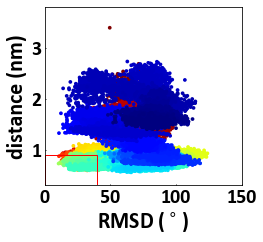

In [27]:
import matplotlib.patches as patches
os.chdir('/home/dongdong/SCR/pdz.run02')
fig = plt.figure(figsize=(4.3,4))
cmap = plt.cm.get_cmap("jet_r")
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap.set_over("white")
filedir='./'
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

for wal in range(8,9):
    sub = fig.add_subplot(1,1,1)
    walker_name='%03d' %wal
    dataR=[]
    dataD=[]
    dataCry=np.loadtxt('crystal.cv')/3.14*180
    for it in range(84):
        iteration="%06d" %it
        filename=filedir+"iter."+str(iteration)+"/00.enhcMD/"+str(walker_name)+"/plm.out"
        data = np.loadtxt(filename)
        for ii in range(len(data)):
            tempR=singleSD(data[ii,1:10]/3.14*180,dataCry)
            dataR.append(tempR)
            dataD.append((data[ii,10]+data[ii,11]+data[ii,12])/3.0)

    sub.scatter(dataR,dataD,c=np.arange(len(dataR)),cmap=cmap,lw = 0,s=14)
    sub.tick_params(direction="in", length=1)
    #plt.text(130,0.6,walker_name,fontproperties=leg_prop)
    plt.ylim(0.3,3.8)
    plt.xlim(0,150)
    sub.set_xticks(np.linspace(0,150,4))
    sub.set_yticks(np.linspace(1,3,3))
    sub.set_ylabel('distance (nm)',fontproperties=font_prop)
    sub.set_xlabel(r'RMSD ($^\circ$)',fontproperties=font_prop)
    sub.add_patch(patches.Rectangle((0, 0),40,0.9, linewidth=1,edgecolor='r',facecolor='none'))
    #leg=sub.legend(loc=4, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=0)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(20)
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
plt.savefig('trj8.png',dpi=600,bbox_inches='tight')
plt.show()


291


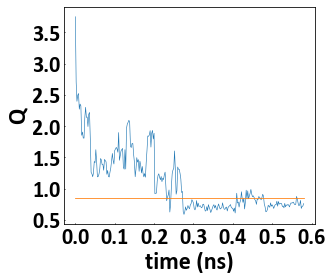

In [93]:

num_walkers=16
os.chdir('/home/dongdong/SCR/pdz.run02')
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(4.5,4))
for en in range(8,9):
    allQ=[]
    for it in range(20):
        dirname='iter.%06d/00.enhcMD/%03d/' %(it,en)
        os.chdir(dirname)
        filename='cls.sel.angle.out'
        Q=np.loadtxt(filename)
        os.chdir('/home/dongdong/SCR/pdz.run02')
        allQ.extend(list(Q))
    np.savetxt('string1.dat',allQ)
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    print(len(allQ))
    allQ=np.array(allQ)
    sub = fig.add_subplot(1,1,1)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,allQ[:,-2],lw=0.6)
    sub.set_ylabel(r'Q',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
    sub.tick_params(direction="in", length=1)
    #plt.ylim(0.,1.)
    #plt.xlim(25,55)
    #sub.set_xticks(np.linspace(0,150,4))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(22)
#plt.savefig('/home/dongdong/SCR/pdz.run02/Q8.png',dpi=600,bbox_inches='tight')
plt.show()

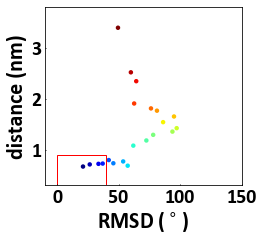

In [155]:
import matplotlib.patches as patches
os.chdir('/home/dongdong/SCR/pdz.run02')
fig = plt.figure(figsize=(4.3,4))
cmap = plt.cm.get_cmap("jet_r")
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap.set_over("white")
filedir='./'
def singleSD1(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

def singleSD(nList,refList):
    aa=nList-refList
    bb=np.abs(aa)
    bb[bb>180]=360-bb[bb>180]
    return np.sqrt(np.mean(bb**2))

sub = fig.add_subplot(1,1,1)
dataR=[]
dataD=[]
dataCry=np.loadtxt('crystal.cv')/3.14*180
data = np.loadtxt('/home/dongdong/SCR/pdz.run02/string8/trj.dat')
for ii in range(len(data)):
    tempR=singleSD(data[ii,0:9]/3.14*180,dataCry[0:9])
    dataR.append(tempR)
    dataD.append((data[ii,9]+data[ii,10]+data[ii,11])/3.0)

sub.scatter(dataR,dataD,c=np.arange(len(dataR)),cmap=cmap,lw = 0,s=20)
sub.tick_params(direction="in", length=1)
#plt.text(130,0.6,walker_name,fontproperties=leg_prop)
plt.ylim(0.3,3.8)
plt.xlim(-10,150)
sub.set_xticks(np.linspace(0,150,4))
sub.set_yticks(np.linspace(1,3,3))
sub.set_ylabel('distance (nm)',fontproperties=font_prop)
sub.set_xlabel(r'RMSD ($^\circ$)',fontproperties=font_prop)
sub.add_patch(patches.Rectangle((0, 0),40,0.9, linewidth=1,edgecolor='r',facecolor='none'))
#leg=sub.legend(loc=4, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=0)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(20)
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
#plt.savefig('trj8.png',dpi=600,bbox_inches='tight')
plt.show()


In [119]:
np.arange(2,0.9,-0.1)

array([ 2. ,  1.9,  1.8,  1.7,  1.6,  1.5,  1.4,  1.3,  1.2,  1.1,  1. ])

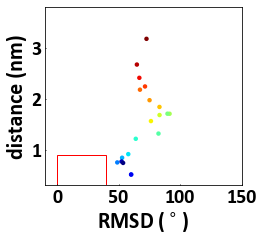

In [169]:
import matplotlib.patches as patches
os.chdir('/home/dongdong/SCR/pdz.run02')
fig = plt.figure(figsize=(4.3,4))
cmap = plt.cm.get_cmap("jet_r")
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap.set_over("white")
filedir='./'
def singleSD1(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

def singleSD(nList,refList):
    aa=nList-refList
    bb=np.abs(aa)
    bb[bb>180]=360-bb[bb>180]
    return np.sqrt(np.mean(bb**2))

sub = fig.add_subplot(1,1,1)
dataR=[]
dataD=[]
dataCry=np.loadtxt('crystal.cv')/3.14*180
data = np.loadtxt('/home/dongdong/SCR/pdz.run02/string8/result1.out')
for ii in range(len(data)):
    tempR=singleSD(data[ii,0:9]/3.14*180,dataCry[0:9])
    dataR.append(tempR)
    dataD.append((data[ii,9]+data[ii,10]+data[ii,11])/3.0)

sub.scatter(dataR,dataD,c=np.arange(len(dataR)),cmap=cmap,lw = 0,s=20)
sub.tick_params(direction="in", length=1)
#plt.text(130,0.6,walker_name,fontproperties=leg_prop)
plt.ylim(0.3,3.8)
plt.xlim(-10,150)
sub.set_xticks(np.linspace(0,150,4))
sub.set_yticks(np.linspace(1,3,3))
sub.set_ylabel('distance (nm)',fontproperties=font_prop)
sub.set_xlabel(r'RMSD ($^\circ$)',fontproperties=font_prop)
sub.add_patch(patches.Rectangle((0, 0),40,0.9, linewidth=1,edgecolor='r',facecolor='none'))
#leg=sub.legend(loc=4, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=0)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(20)
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
#plt.savefig('trj8.png',dpi=600,bbox_inches='tight')
plt.show()

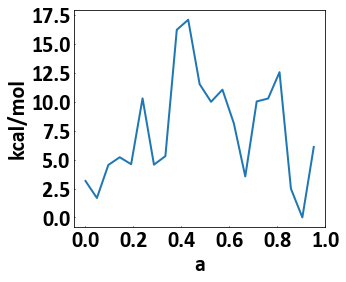

In [166]:
fig = plt.figure(figsize=(4.5,4))
data=np.loadtxt('/home/dongdong/SCR/pdz.run02/string8/free_energy.out')
sub = fig.add_subplot(1,1,1)
sub.plot(np.array(range(len(data)))/len(data),data-np.min(data),lw=2)
sub.set_ylabel(r'kcal/mol',fontproperties=font_prop)
sub.set_xlabel(r'a',fontproperties=font_prop)
#sub.plot(np.array(range(len(allQ)))/1000.0*2,[0.85]*len(allQ),lw=0.8)
sub.tick_params(direction="in", length=1)
#plt.ylim(0.,1.)
#plt.xlim(25,55)
#sub.set_xticks(np.linspace(0,150,4))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(22)
#plt.savefig('/home/dongdong/SCR/pdz.run02/Q8.png',dpi=600,bbox_inches='tight')
plt.show()

In [167]:
len(data)

21

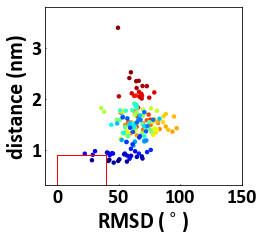

In [50]:
import matplotlib.patches as patches
os.chdir('/home/dongdong/SCR/pdz.run02')
fig = plt.figure(figsize=(4.3,4))
cmap = plt.cm.get_cmap("jet_r")
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap.set_over("white")
filedir='./'
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)
sub = fig.add_subplot(1,1,1)
dataR=[]
dataD=[]
dataCry=np.loadtxt('crystal.cv')/3.14*180
data = np.loadtxt('/home/dongdong/SCR/pdz.run02/string2/string1.dat')
for ii in range(len(data)):
    tempR=singleSD(data[ii,0:9]/3.14*180,dataCry)
    dataR.append(tempR)
    dataD.append((data[ii,9]+data[ii,10]+data[ii,11])/3.0)

sub.scatter(dataR,dataD,c=np.arange(len(dataR)),cmap=cmap,lw = 0,s=20)
sub.tick_params(direction="in", length=1)
#plt.text(130,0.6,walker_name,fontproperties=leg_prop)
plt.ylim(0.3,3.8)
plt.xlim(-10,150)
sub.set_xticks(np.linspace(0,150,4))
sub.set_yticks(np.linspace(1,3,3))
sub.set_ylabel('distance (nm)',fontproperties=font_prop)
sub.set_xlabel(r'RMSD ($^\circ$)',fontproperties=font_prop)
sub.add_patch(patches.Rectangle((0, 0),40,0.9, linewidth=1,edgecolor='r',facecolor='none'))
#leg=sub.legend(loc=4, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=0)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(20)
plt.tight_layout(pad=3, w_pad=0.8, h_pad=0.4)
#plt.savefig('trj8.png',dpi=600,bbox_inches='tight')
plt.show()

In [135]:
cd /home/dongdong/SCR/pdz.run02/string8

/scratch/gpfs/dongdong/pdz.run02/string8


In [136]:
data = np.loadtxt ('string1.dat')
dataR=[]
dataD=[]
dataCry=np.loadtxt('crystal.cv')/3.14*180
for ii in range(len(data)):
    tempR=singleSD(data[ii,0:9]/3.14*180,dataCry[0:9])
    dataR.append(tempR)
    dataD.append((data[ii,9]+data[ii,10]+data[ii,11])/3.0)
dataR=np.array(dataR)
dataD=np.array(dataD)
dataR=dataR.reshape(-1,1)
dataD=dataD.reshape(-1,1)
alldata=np.concatenate((dataR,dataD),axis=1)
print(alldata)


[[ 49.47399294   3.38907433]
 [ 59.97149278   2.51463967]
 [ 64.32205662   2.340954  ]
 [ 58.71689532   2.40196833]
 [ 66.34409925   2.34793667]
 [ 64.63853911   2.206282  ]
 [ 69.44900239   2.24625133]
 [ 72.93815709   2.24368733]
 [ 67.06117275   2.03595967]
 [ 50.20402333   2.043349  ]
 [ 74.88364488   2.01767767]
 [ 68.74045543   2.000196  ]
 [ 60.67060817   2.10293867]
 [ 66.59571436   2.13037733]
 [ 79.00600842   2.119977  ]
 [ 68.50327136   2.09061433]
 [ 69.01645899   2.056014  ]
 [ 62.70269437   2.05121367]
 [ 64.18903937   2.059382  ]
 [ 65.8693387    1.82274167]
 [ 60.71468125   1.52546267]
 [ 75.73436928   1.58580133]
 [ 64.60187344   1.44634633]
 [ 69.7164296    1.50795267]
 [ 64.65755947   1.66447933]
 [ 74.39912735   1.68500967]
 [ 63.03650593   1.74493533]
 [ 51.78162283   1.72487433]
 [ 72.87952407   1.572581  ]
 [ 58.78649602   1.523282  ]
 [ 57.84409857   1.54954333]
 [ 82.04418297   1.52350267]
 [ 55.24895823   1.46030333]
 [ 69.92113319   1.390323  ]
 [ 71.07511388

In [129]:
f=open('trj.dat','ab')
for i in range(len(alldata)):
    if alldata[i][1]>2:
        
        np.savetxt(f,data[i],fmt = '%.3f')
        
        break

In [137]:
rrange=np.arange(2,0.9,-0.1)
for r in range(len(rrange)-1):
    temp=[]
    temp_o=[]
    for i in range(len(alldata)):
        if alldata[i][1]<rrange[r] and alldata[i][1]>rrange[r+1]:
            #print(alldata[i])
            temp.append(alldata[i])
            temp_o.append(data[i])
    temp=np.array([temp])
    print(temp)
    if len(temp)>1:
        print(temp[0,:])
        aa=np.argmax(temp[0,:])
        allsave.append(temp_o[aa])


[[[ 62.61579969   1.903068  ]]]
[[[ 65.8693387    1.82274167]
  [ 76.30463383   1.80646333]
  [ 35.80507835   1.813746  ]
  [ 64.3757397    1.88227333]
  [ 63.36582269   1.87628633]
  [ 64.82349974   1.81589233]
  [ 64.35497498   1.84809067]]]
[[[ 63.03650593   1.74493533]
  [ 51.78162283   1.72487433]
  [ 54.05519146   1.74777067]
  [ 81.16674692   1.76203933]
  [ 69.79222507   1.780359  ]
  [ 51.96482347   1.74318133]
  [ 38.25415737   1.73986667]
  [ 64.67386024   1.730942  ]
  [ 71.18296246   1.72836467]
  [ 61.13238257   1.77145867]
  [ 51.23148152   1.76817567]
  [ 55.94694154   1.76138833]
  [ 70.83306516   1.73170867]]]
[[[ 64.65755947   1.66447933]
  [ 74.39912735   1.68500967]
  [ 95.03065799   1.64801967]
  [ 88.3552109    1.698042  ]
  [ 86.56923005   1.653248  ]
  [ 63.07388404   1.67765367]
  [ 63.33373966   1.699435  ]
  [ 69.74215267   1.660028  ]
  [ 67.39909233   1.67068033]
  [ 83.22304634   1.60301133]
  [ 53.28394424   1.649096  ]
  [ 66.21797572   1.60223167]
  [ 

In [143]:
temp[0][:,0]

array([ 61.94421205,  59.99444544])